The original tutorial link is here:
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/ 

 Merging and joining dataframes is a core process that any aspiring data analyst will need to master. 
 
 Key topics here:
 1. What is a merge or join?
 2. What are inner, outer, left and right merges?
 3. How do I merge two data frames with different common names? 

In [20]:
import pandas as pd
import numpy as np
from subprocess import check_output
print(check_output(['ls',"../Python Data Manipulations"]).decode("utf8"))
%matplotlib inline

10 Minutes to Pandas
Adult
Explore ML Dataset.ipynb
Merge and Join DataFrames with Pandas in Python.ipynb
Numpy .ipynb
Pandas Cookbook
Pandas Tutorial
Practical Data Analysis from Pandas
Practical Tutorial on Data Manipulation with Numpy and Pandas in Python.ipynb
Summarising, Aggregating, and Grouping data in Python Pandas.ipynb
android_devices.csv
datafiles19cdaf8.zip
phone_data.csv
user_device.csv
user_usage.csv



In [6]:
user_usage=pd.read_csv("../Python Data Manipulations/user_usage.csv")

In [7]:
user_device=pd.read_csv("../Python Data Manipulations/user_device.csv")

In [10]:
devices=pd.read_csv("../Python Data Manipulations/android_devices.csv")

In [11]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [12]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [13]:
devices.head()
# lot of missing data

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


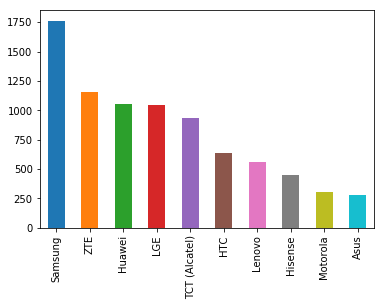

In [25]:
devices["Retail Branding"].value_counts()[:10].plot(kind="bar")

After reviewing the data, it is clear that there are common fields to establish the linkage.

use_id is shared between user_usage and user_device
Device/Model is shared between user_device and devices

In Pandas there are two key functions that sort of do the same thing:
1. Merge
2. Join

In [26]:
# Merging user_usage with user_devices 
result=pd.merge(user_usage,user_device[['use_id', 'platform', 'device']],
               on="use_id")
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


The merge command is the easiest as it takes a left dataframe, a right data frame and a merge column name. 

Pandas merge() defaults to an inner merge operation

An inner merge keeps only the common values in both the left and right dataframes. We can validate the merge results by looking at the common ids across the two dataframes

In [27]:
user_usage["use_id"].isin(user_device["use_id"]).value_counts()

True     159
False     81
Name: use_id, dtype: int64

In [28]:
result.shape

(159, 6)

# Other merge types:
1. Inner merge/inner join - the default pandas behavior
2. Left merge/left outer - keep every row in the left dataframe. Where there are missing values of the on variable in right dataframe then the empyty/Nan values in the result
3. Right Merge/right outer join - keep every row in the right dataframe. 
4. Outer merge/full outer join - a full outer join returns all the rows in both with NaNs elsewhere. 

In [29]:
# We can change the default from inner to left joins by specifying through 
# the how parameter
result=pd.merge(user_usage,user_device[['use_id', 'platform', 'device']],
               on="use_id",how="left")

In [30]:
result.shape

(240, 6)

In [31]:
user_usage.shape

(240, 4)

In [32]:
# Right merge/ right join
result=pd.merge(user_usage,user_device[['use_id', 'platform', 'device']],
               on="use_id",how="right")


In [33]:
result.shape

(272, 6)

In [34]:
user_device.shape

(272, 6)

In [37]:
# Example of full outer join/outer merge
# In full outer join, every row on both left and right are retained. THe results 
# is expected to have the same number of rows as there are distinct values of use_id between
# user_device and user_usage.
# We can use merge indicator to track merges 

result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='outer', 
                 indicator=True)
# This indicator parameter is very important 

In [38]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,_merge
0,21.97,4.82,1557.33,22787,android,GT-I9505,both
1,1710.08,136.88,7267.55,22788,android,SM-G930F,both
2,1710.08,136.88,7267.55,22789,android,SM-G930F,both
3,94.46,35.17,519.12,22790,android,D2303,both
4,71.59,79.26,1557.33,22792,android,SM-G361F,both


In [39]:
result._merge.value_counts()

both          159
right_only    113
left_only      81
Name: _merge, dtype: int64

# Final merge - joining device details to result


In [40]:
result=pd.merge(user_usage,user_device[["use_id","platform","device"]],
               on="use_id",
               how="left")